## This is a test example of using self organining map to cluster the conformational space of protein md trajectory in unsupervised manner.

In [1]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt

import hdbscan
import mdtraj
import alphaspace
from numba import *
from itertools import combinations
import hypertools as hyp
import _pickle as pickle

In [4]:
# load APO sasa
with open('/Users/haotian/Trajectory/bcl2/apo/md1/delta_sasa.pickle','rb') as handle:
    apo_delta_sasa = np.array(pickle.load(handle))
with open('/Users/haotian/Trajectory/bcl2/apo/md1/abs_sasa.pickle','rb') as handle:
    apo_abs_sasa = np.array(pickle.load(handle))

#load holo md1 sasa
with open('/Users/haotian/Trajectory/bcl2/holo/md1/delta_sasa.pickle','rb') as handle:
    holo_delta_sasa_1 = np.array(pickle.load(handle))
with open('/Users/haotian/Trajectory/bcl2/holo/md1/abs_sasa.pickle','rb') as handle:
    holo_abs_sasa_1 = np.array(pickle.load(handle))
    
#load holo md1 sasa
with open('/Users/haotian/Trajectory/bcl2/holo/md2/delta_sasa.pickle','rb') as handle:
    holo_delta_sasa_2 = np.array(pickle.load(handle))
with open('/Users/haotian/Trajectory/bcl2/holo/md2/abs_sasa.pickle','rb') as handle:
    holo_abs_sasa_2 = np.array(pickle.load(handle))    

# join sasa together
# Apo + holo1 + holo2

delta_sasa = np.concatenate([apo_delta_sasa,holo_delta_sasa_1,holo_delta_sasa_2])
abs_sasa = np.concatenate([apo_abs_sasa,holo_abs_sasa_1,holo_abs_sasa_2])
print(delta_sasa.shape, abs_sasa.shape)

(60000, 948) (60000, 948)


In [5]:
# Normalize them
delta_sasa = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, delta_sasa)
abs_sasa = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, abs_sasa)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


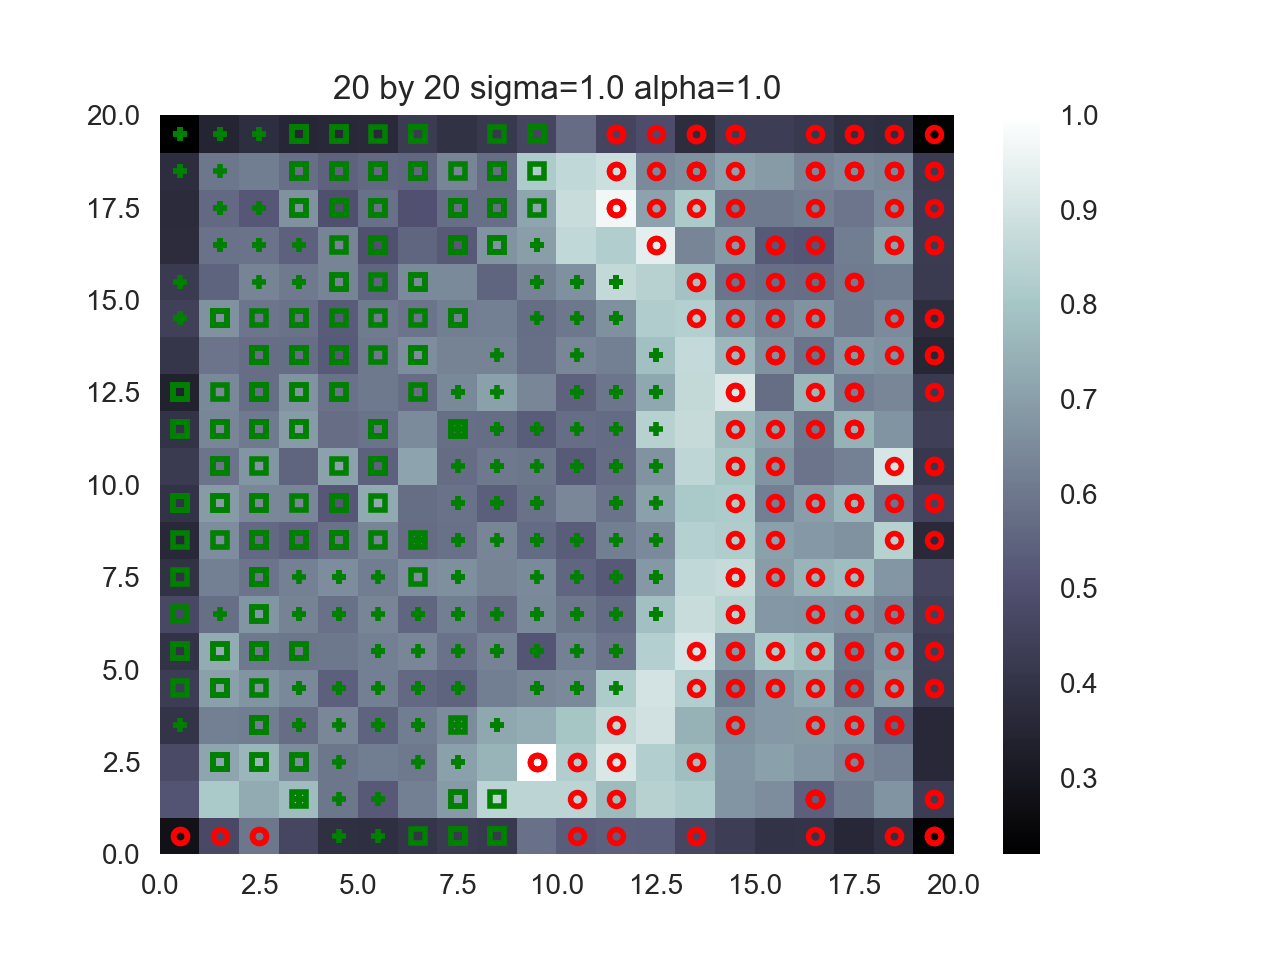

In [156]:
%matplotlib

dimension = 20
sigma = 1.0
alpha = 1.0

training_features = delta_sasa[::]
labels = np.array([0] * 20000 + [1]*20000+[2]*20000)



som = MiniSom(dimension,dimension,948,sigma=sigma,learning_rate=1)
som.random_weights_init(training_features)
som.train_random(training_features, 2000)  # random training
plt.bone()
plt.title('{} by {} sigma={} alpha={}'.format(dimension,dimension,sigma,alpha))
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

markers = ['o', 's', '+']
colors = ['r', 'g', 'g']

winner_count = np.zeros_like(som.distance_map())

for i,sasa in enumerate(delta_sasa[:]):
    if i % 100 == 0:
        
#         if i > 20000 or True:
        
            winner = som.winner(sasa)
            plt.plot(winner[0]+ 0.5, winner[1]+ 0.5, markers[int(i/20000)], markerfacecolor='None', 
                     markeredgecolor = colors[int(i/20000)], markersize=5, markeredgewidth=2
                    )
    
plt.show()

In [86]:
for i,sasa in enumerate(abs_sasa):
    if i % 100 == 0:
        
        if i < 20000 or i > 10000:
        
            winner = som.winner(sasa)
            plt.plot(winner[0]+ 0.5, winner[1]+ 0.5, markers[int(i/20000)], markerfacecolor='None', 
                     markeredgecolor = colors[int(i/20000)], markersize=5, markeredgewidth=2
                    )
    

In [ ]:
data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
som = MiniSom(7, 7, 4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")

# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

target = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.show()

In [171]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3,random_state=0).fit(abs_sasa)

In [173]:
np.histogram(clusterer.labels_,bins=3)

(array([ 7505, 40000, 12495]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]))